# Discrete Fourier Transform for de-noising

In [ ]:
# Code below is based on Chapter 12 python notebook
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from IPython.display import Audio
plt.rcParams["figure.figsize"]=(15,4) # Set default figure 

## A nice chord

In [29]:
N = 40000
k1 = 400; k2 = 500; k3 = 600; 
n = np.arange(0,N)
x = sum([np.cos(2*np.pi*k*n/N) for k in [k1, k2, k3]])
Audio(x,rate=N/2)

## With random noise

In [30]:
noise_level = 10
x_noisy = x + noise_level*np.random.normal(0,1,N)
Audio(x_noisy, rate = N/2)

## Plot clean version and with noise

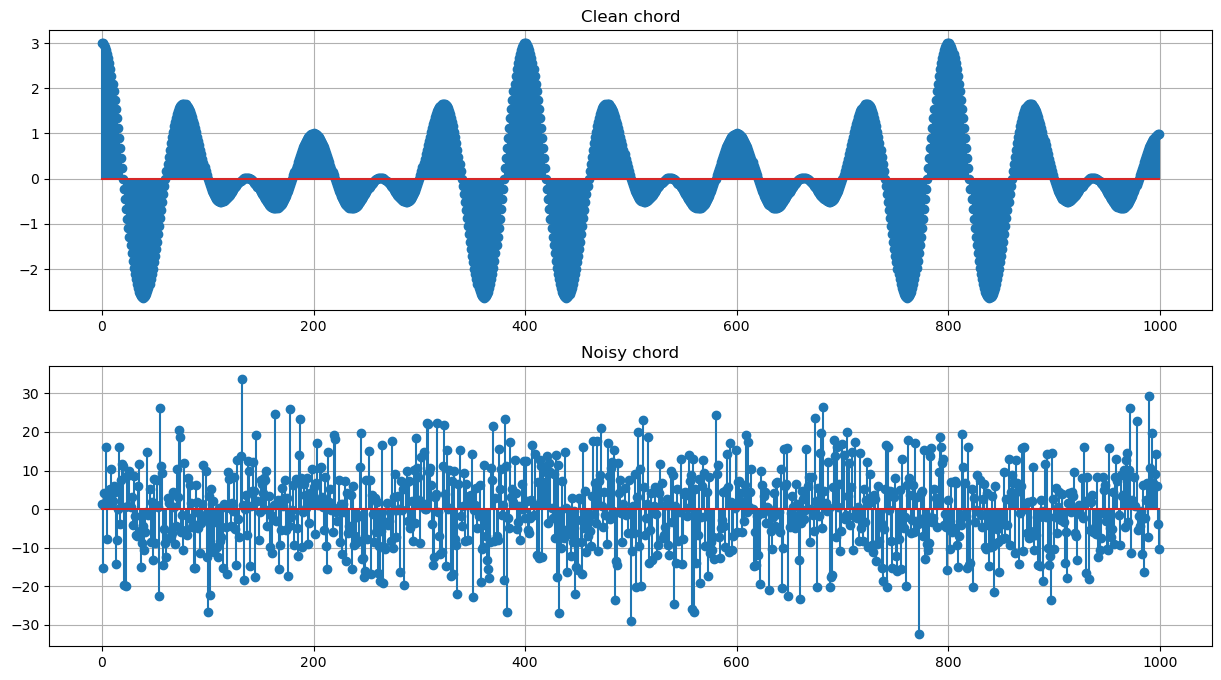

In [31]:
plt.figure(figsize = (15, 8))
plt.subplot(2,1,1)
plt.stem(x[0:1000])
plt.title('Clean chord'); plt.grid(True);

plt.subplot(2,1,2)
plt.stem(x_noisy[0:1000])
plt.title('Noisy chord'); plt.grid(True);

## Filtering

In [33]:
y = np.fft.fft(x_noisy) # DFT of noisy chord

y_filtered = y.copy()
y_filtered[np.abs(y) < 10000] = 0.0  # Remove the "small" frequencies

x_filtered = np.fft.ifft(y_filtered).real

Audio(x_filtered, rate = N/2)

## Why did this work?  In Fourier basis, chord is sparse but noise is spread.

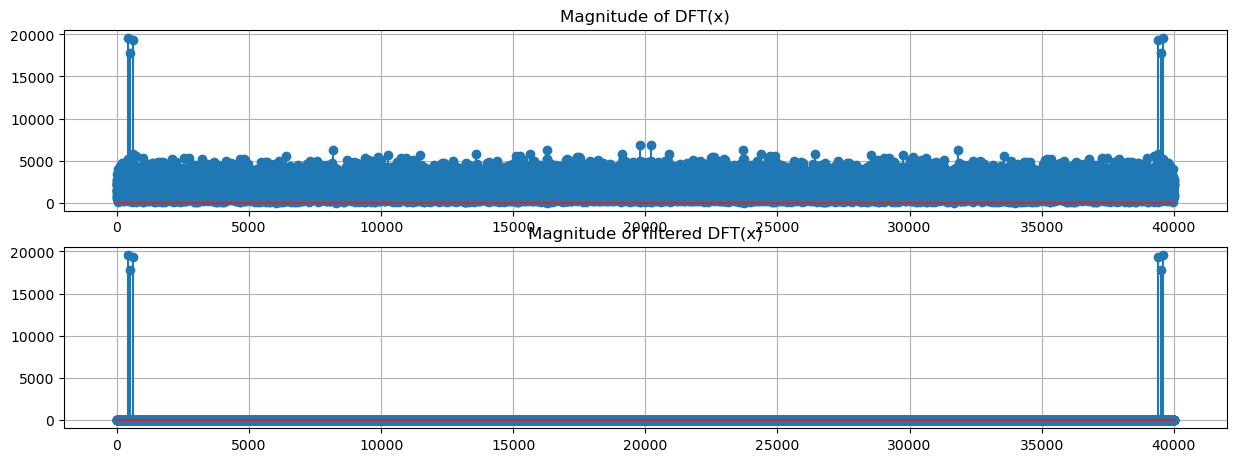

In [34]:
plt.figure(figsize=(15,8))
plt.subplot(3,1,1)
plt.stem(np.abs(y))
plt.title('Magnitude of DFT(x)'); plt.grid(True);

plt.subplot(3,1,2)
plt.stem(y_filtered.real)
plt.title('Magnitude of filtered DFT(x)'); plt.grid(True);
plt.show();
